In [146]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import *

# Preprocessing

In [147]:
# read data
data_path = '/Users/wangchangzai/Desktop/巨量資料應用專題/Nomurafunds/FeatureTable/'
feature_df = pd.read_csv(data_path + 'low_level_users.csv', dtype={'Fund_Name': str,
                                                                    'TAIEX': float,
                                                                    'VIX_index': float,
                                                                    'S&P_500_index': float,
                                                                    'fund_net_worth': float,
                                                                    'Allot_Amount': int}, parse_dates=['Allot_Date'])
feature_df.sort_values(by=['Allot_Date'], inplace=True, ignore_index=True)
feature_df

,Allot_Date,Fund_Name,TAIEX_index,VIX_index,S&P_500_index,sentiment_score_pos,sentiment_score_neg,Allot_Amount
0,2021-09-01,野村台灣高股息證券投資信託基金,0.51,-0.015533,0.001090,21.0,17.0,9531
1,2021-09-01,野村全球生技醫療證券投資信託基金,0.51,-0.015533,0.001090,0.0,0.0,-1019917
2,2021-09-01,野村全球不動產證券化證券投資信託基金,0.51,-0.015533,0.001090,0.0,0.0,-56198
3,2021-09-01,野村優質證券投資信託基金,0.51,-0.015533,0.001090,134.0,59.0,-36807067
4,2021-09-01,野村優質證券投資信託基金,0.51,-0.015533,0.001090,134.0,59.0,-36807067
...,...,...,...,...,...,...,...,...
227828,2022-02-27,野村大俄羅斯證券投資信託基金,0.33,-0.045200,0.005829,0.0,0.0,4238715
227829,2022-02-27,野村優質證券投資信託基金,0.33,-0.045200,0.005829,3.0,0.0,-12325547
227830,2022-02-27,野村優質證券投資信託基金,0.33,-0.045200,0.005829,3.0,0.0,-12325547
227831,2022-02-27,野村中小證券投資信託基金,0.33,-0.045200,0.005829,3.0,0.0,-1256610


In [148]:
feature_df_without_senti_score = feature_df.copy()
feature_df_without_senti_score.drop(columns=['sentiment_score_pos', 'sentiment_score_neg'], inplace=True)
feature_df_without_senti_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227833 entries, 0 to 227832
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Allot_Date     227833 non-null  datetime64[ns]
 1   Fund_Name      227833 non-null  object        
 2   TAIEX_index    227833 non-null  float64       
 3   VIX_index      227833 non-null  float64       
 4   S&P_500_index  227833 non-null  float64       
 5   Allot_Amount   227833 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 10.4+ MB


In [149]:
feature_df.dropna(inplace=True)
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227833 entries, 0 to 227832
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Allot_Date           227833 non-null  datetime64[ns]
 1   Fund_Name            227833 non-null  object        
 2   TAIEX_index          227833 non-null  float64       
 3   VIX_index            227833 non-null  float64       
 4   S&P_500_index        227833 non-null  float64       
 5   sentiment_score_pos  227833 non-null  float64       
 6   sentiment_score_neg  227833 non-null  float64       
 7   Allot_Amount         227833 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 13.9+ MB


# Feature Engineering

## Correlation coefficient between feature

<AxesSubplot:>

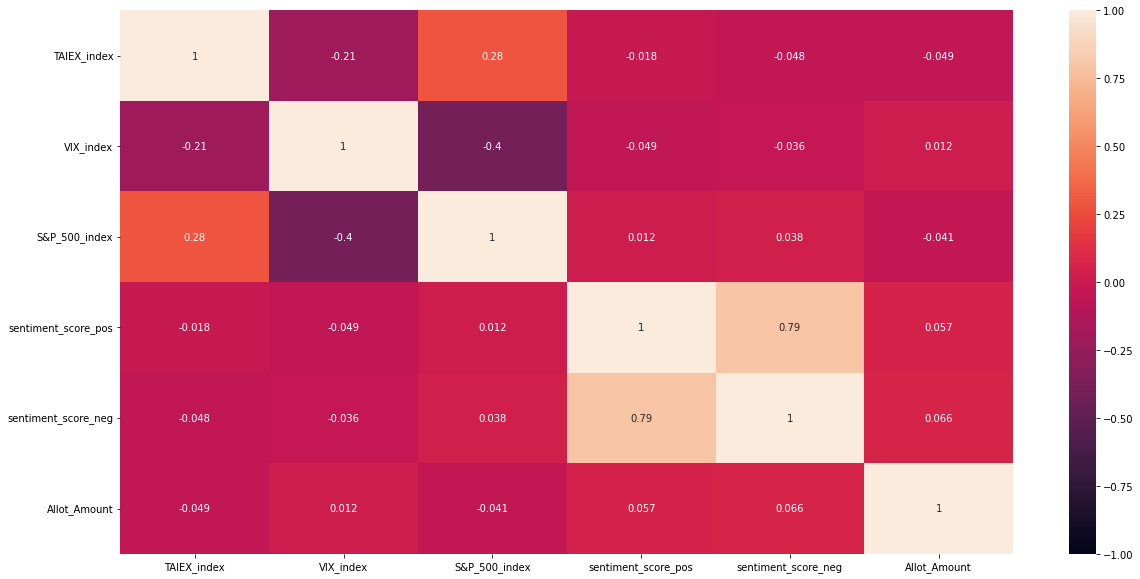

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(feature_df.corr(method='pearson'), vmin=-1, vmax=1, annot=True)

## Standardization

In [151]:
# feature_df_numerics = feature_df.select_dtypes(include=np.number).columns.tolist()
# feature_df_numerics = feature_df_numerics[:-1]
# feature_df_without_net_worth_numerics = feature_df_numerics[:-1]
# print(feature_df_numerics)
# print(feature_df_without_net_worth_numerics)

In [152]:
# from sklearn.preprocessing import StandardScaler

# feature_df[feature_df_numerics] = StandardScaler().fit_transform(feature_df[feature_df_numerics])
# STD_feature_df = feature_df
# STD_feature_df

In [153]:
# feature_df_without_net_worth[feature_df_without_net_worth_numerics] = StandardScaler().fit_transform(feature_df_without_net_worth[feature_df_without_net_worth_numerics])
# STD_feature_df_without_net_worth = feature_df_without_net_worth
# STD_feature_df_without_net_worth

## fund_name do one-hot encoding

In [154]:
feature_df = pd.get_dummies(feature_df, columns=['Fund_Name'])

In [155]:
feature_df_without_senti_score = pd.get_dummies(feature_df_without_senti_score, columns=['Fund_Name'])

## PCA

In [156]:
# from sklearn.decomposition import PCA

# pca = PCA()
# pca.fit(STD_feature_df[feature_df_numerics])
# PCA_feature_df = pca.transform(STD_feature_df[feature_df_numerics])
# PCA_feature_df = pd.DataFrame(data=PCA_feature_df, columns={'PC1', 'PC2', 'PC3', 'PC4'})
# PCA_feature_df['Allot_Amount'] = STD_feature_df['Allot_Amount'].values
# PCA_feature_df

# Modeling

In [157]:
# feature data
feature_data = feature_df.drop(columns=['Allot_Amount'])
feature_data_without_senti_score = feature_df_without_senti_score.drop(columns=['Allot_Amount'])

# target data
target = feature_df['Allot_Amount']
without_senti_score_target = feature_df_without_senti_score['Allot_Amount']

In [158]:
# 將2月份資料當作測試集
X_train_with_senti_score = feature_data[feature_data['Allot_Date'] < '2022-02-01']
X_test_with_senti_score = feature_data[feature_data['Allot_Date'] >= '2022-02-01']
print(len(X_train_with_senti_score), len(X_test_with_senti_score))
Y_train_with_senti_score = pd.DataFrame(target[:len(X_train_with_senti_score)])
Y_test_with_senti_score = pd.DataFrame(target[len(X_train_with_senti_score):])

191692 36141


In [159]:
X_train_without_senti_score = feature_data_without_senti_score[feature_data_without_senti_score['Allot_Date'] < '2022-02-01']
X_test_without_senti_score = feature_data_without_senti_score[feature_data_without_senti_score['Allot_Date'] >= '2022-02-01']
print(len(X_train_without_senti_score), len(X_test_without_senti_score))
Y_train_without_senti_score = pd.DataFrame(without_senti_score_target[:len(X_train_without_senti_score)])
Y_test_without_senti_score = pd.DataFrame(without_senti_score_target[len(X_train_without_senti_score):])

191692 36141


In [160]:
# drop date from train & test dataset
X_train_with_senti_score.drop(columns=['Allot_Date'], inplace=True)
X_test_with_senti_score.drop(columns=['Allot_Date'], inplace=True)
X_train_without_senti_score.drop(columns=['Allot_Date'], inplace=True)
X_test_without_senti_score.drop(columns=['Allot_Date'], inplace=True)

/var/folders/wh/q9jpw9q91cj339hv7crgg_xm0000gn/T/ipykernel_11260/2872395406.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_with_senti_score.drop(columns=['Allot_Date'], inplace=True)
/var/folders/wh/q9jpw9q91cj339hv7crgg_xm0000gn/T/ipykernel_11260/2872395406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_with_senti_score.drop(columns=['Allot_Date'], inplace=True)
/var/folders/wh/q9jpw9q91cj339hv7crgg_xm0000gn/T/ipykernel_11260/2872395406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.o

In [161]:
X_train_with_senti_score.to_csv('x_train/X_train_with_senti_score.csv', encoding='utf-8', index=False)
X_test_with_senti_score.to_csv('x_test/X_test_with_senti_score.csv', encoding='utf-8', index=False)
X_train_without_senti_score.to_csv('x_train/X_train_without_senti_score.csv', encoding='utf-8', index=False)
X_test_without_senti_score.to_csv('x_test/X_test_without_senti_score.csv', encoding='utf-8', index=False)

Y_train_with_senti_score.to_csv('y_train/Y_train_with_senti_score.csv', encoding='utf-8', index=False)
Y_test_with_senti_score.to_csv('y_test/Y_test_with_senti_score.csv', encoding='utf-8', index=False)
Y_train_without_senti_score.to_csv('y_train/Y_train_without_senti_score.csv', encoding='utf-8', index=False)
Y_test_without_senti_score.to_csv('y_test/Y_test_without_senti_score.csv', encoding='utf-8', index=False)

## Regression

### Linear Regression

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear = LinearRegression()

In [163]:
# 訓練Linear Regression模型
linear_regression_with_senti_score = linear.fit(X_train_with_senti_score, Y_train_with_senti_score)

# 預測驗證集資料的結果
predictions_with_senti_score = linear_regression_with_senti_score.predict(X_test_with_senti_score)

# 評估模型成效
print('Valid RMSE with net worth:', mean_squared_error(predictions_with_senti_score, Y_test_with_senti_score) ** 0.5)

Valid RMSE with net worth: 67601502.43193437


In [164]:
test5 = linear_regression_with_senti_score.predict(X_train_with_senti_score)
print('Valid RMSE with net worth:', mean_squared_error(test5, Y_train_with_senti_score) ** 0.5)

Valid RMSE with net worth: 95745435.06469892


In [165]:
# 訓練Linear Regression模型
linear_regression_without_senti_score = linear.fit(X_train_without_senti_score, Y_train_without_senti_score)

# 預測驗證集資料的結果
predictions_without_senti_score = linear_regression_without_senti_score.predict(X_test_without_senti_score)

# 評估模型成效
print('Valid RMSE without net worth:', mean_squared_error(predictions_without_senti_score, Y_test_without_senti_score) ** 0.5)

Valid RMSE without net worth: 5.947531246643957e+18


In [166]:
test6 = linear_regression_without_senti_score.predict(X_train_without_senti_score)
print('Valid RMSE with net worth:', mean_squared_error(test6, Y_train_without_senti_score) ** 0.5)

Valid RMSE with net worth: 96586549.92924783


### XGBoost Regression

In [167]:
from xgboost import XGBRegressor

xgb_r = XGBRegressor()

In [168]:
# 訓練XGBoost Regression模型
xgb_r_with_senti_score = xgb_r.fit(X_train_with_senti_score, Y_train_with_senti_score)

# 預測驗證集資料的結果
xgb_r_predictions_with_senti_score = xgb_r_with_senti_score.predict(X_test_with_senti_score)

# 評估模型成效
print('Valid RMSE with net worth:', mean_squared_error(xgb_r_predictions_with_senti_score, Y_test_with_senti_score) ** 0.5)

Valid RMSE with net worth: 92050424.4497884


In [169]:
test7 = xgb_r_with_senti_score.predict(X_train_with_senti_score)
print('Valid RMSE with net worth:', mean_squared_error(test7, Y_train_with_senti_score) ** 0.5)

Valid RMSE with net worth: 3185867.207702693


In [170]:
# 訓練XGBoost Regression模型
xgb_r_without_senti_score = xgb_r.fit(X_train_without_senti_score, Y_train_without_senti_score)

# 預測驗證集資料的結果
xgb_r_predictions_without_senti_score = xgb_r_without_senti_score.predict(X_test_without_senti_score)

# 評估模型成效
print('Valid RMSE without net worth:', mean_squared_error(xgb_r_predictions_without_senti_score, Y_test_without_senti_score) ** 0.5)

Valid RMSE without net worth: 105501256.21433386


In [171]:
test8 = xgb_r_without_senti_score.predict(X_train_without_senti_score)
print('Valid RMSE with net worth:', mean_squared_error(test8, Y_train_without_senti_score) ** 0.5)

Valid RMSE with net worth: 2950030.72705115


## Classification

In [172]:
# copy target dataset
class_Y_test_with_senti_score = Y_test_with_senti_score.copy()
class_Y_train_with_senti_score = Y_train_with_senti_score.copy()
class_Y_test_without_senti_score = Y_test_without_senti_score.copy()
class_Y_train_without_senti_score = Y_train_without_senti_score.copy()

In [173]:
def sub_red(x):
    if x >= 0:
        return 0
    else:
        return 1

In [174]:
# transform into 申購=0 or 贖回=1
class_Y_test_with_senti_score['Allot_Amount'] = class_Y_test_with_senti_score['Allot_Amount'].apply(sub_red)
class_Y_train_with_senti_score['Allot_Amount'] = class_Y_train_with_senti_score['Allot_Amount'].apply(sub_red)
class_Y_test_without_senti_score['Allot_Amount'] = class_Y_test_without_senti_score['Allot_Amount'].apply(sub_red)
class_Y_train_without_senti_score['Allot_Amount'] = class_Y_train_without_senti_score['Allot_Amount'].apply(sub_red)

### logistic regression

In [175]:
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression()

In [176]:
from sklearn.metrics import accuracy_score , f1_score

log_r_with_senti_score = log_r.fit(X_train_with_senti_score, class_Y_train_with_senti_score)
log_r_predictions_with_senti_score = log_r_with_senti_score.predict(X_test_with_senti_score)
print('Valid accuracy net worth', accuracy_score(log_r_predictions_with_senti_score, class_Y_test_with_senti_score))
print('Valid F1-score net worth', f1_score(log_r_predictions_with_senti_score, class_Y_test_with_senti_score, average='macro'))

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Valid accuracy net worth 0.5203785174732298
Valid F1-score net worth 0.518500677982499


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [177]:
test1 = log_r_with_senti_score.predict(X_train_with_senti_score)
print('Valid accuracy net worth', accuracy_score(test1, class_Y_train_with_senti_score))
print('Valid F1-score net worth', f1_score(test1, class_Y_train_with_senti_score, average='macro'))

Valid accuracy net worth 0.61883646683221
Valid F1-score net worth 0.6092899220718546


In [178]:
log_r_without_senti_score = log_r.fit(X_train_without_senti_score, class_Y_train_without_senti_score)
log_r_predictions_without_senti_score = log_r_without_senti_score.predict(X_test_without_senti_score)
print('Valid accuracy net worth', accuracy_score(log_r_predictions_without_senti_score, class_Y_test_without_senti_score))
print('Valid F1-score net worth', f1_score(log_r_predictions_without_senti_score, class_Y_test_without_senti_score, average='macro'))

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Valid accuracy net worth 0.5289560333139648
Valid F1-score net worth 0.5270187422857618


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [179]:
test2 = log_r_without_senti_score.predict(X_train_without_senti_score)
print('Valid accuracy net worth', accuracy_score(test2, class_Y_train_without_senti_score))
print('Valid F1-score net worth', f1_score(test2, class_Y_train_without_senti_score, average='macro'))

Valid accuracy net worth 0.6287951505540137
Valid F1-score net worth 0.6179153836143588


In [180]:
from xgboost import XGBClassifier

xgb_c = XGBClassifier()

In [181]:
xgb_c_with_senti_score = xgb_c.fit(X_train_with_senti_score, class_Y_train_with_senti_score)
xgb_c_predictions_with_senti_score = xgb_c_with_senti_score.predict(X_test_with_senti_score)
print('Valid accuracy net worth', accuracy_score(xgb_c_predictions_with_senti_score, class_Y_test_with_senti_score))
print('Valid F1-score net worth', f1_score(xgb_c_predictions_with_senti_score, class_Y_test_with_senti_score, average='macro'))

Valid accuracy net worth 0.525109985888603
Valid F1-score net worth 0.5173590382395687


In [182]:
test3 = xgb_c_with_senti_score.predict(X_train_with_senti_score)
print('Valid accuracy net worth', accuracy_score(test3, class_Y_train_with_senti_score))
print('Valid F1-score net worth', f1_score(test3, class_Y_train_with_senti_score, average='macro'))

Valid accuracy net worth 0.9563935897168374
Valid F1-score net worth 0.9559188611190457


In [183]:
xgb_c_without_senti_score = xgb_c.fit(X_train_without_senti_score, class_Y_train_without_senti_score)
xgb_c_predictions_without_senti_score = xgb_c_without_senti_score.predict(X_test_without_senti_score)
print('Valid accuracy net worth', accuracy_score(xgb_c_predictions_without_senti_score, class_Y_test_without_senti_score))
print('Valid F1-score net worth', f1_score(xgb_c_predictions_without_senti_score, class_Y_test_without_senti_score, average='macro'))

Valid accuracy net worth 0.4803962258930301
Valid F1-score net worth 0.47393933215140205


In [184]:
test4 = xgb_c_without_senti_score.predict(X_train_without_senti_score)
print('Valid accuracy net worth', accuracy_score(test4, class_Y_train_without_senti_score))
print('Valid F1-score net worth', f1_score(test4, class_Y_train_without_senti_score, average='macro'))

Valid accuracy net worth 0.9328610479310561
Valid F1-score net worth 0.9323821646077624
